In [1]:
import matplotlib.pyplot as plt

%matplotlib notebook

import numpy as np; np.random.seed(1)


x = np.random.rand(15)
y = np.random.rand(15)
names = np.array(list("ABCDEFGHIJKLMNO"))
c = np.random.randint(1,5,size=15)

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1)

x = np.sort(np.random.rand(15))
y = np.sort(np.random.rand(15))
names = np.array(list("ABCDEFGHIJKLMNO"))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
line, = plt.plot(x,y, marker="o")

annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(" ".join(list(map(str,ind["ind"]))), 
                           " ".join([names[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

<IPython.core.display.Javascript object>

In [4]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 14.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


NameError: name 'cursor' is not defined

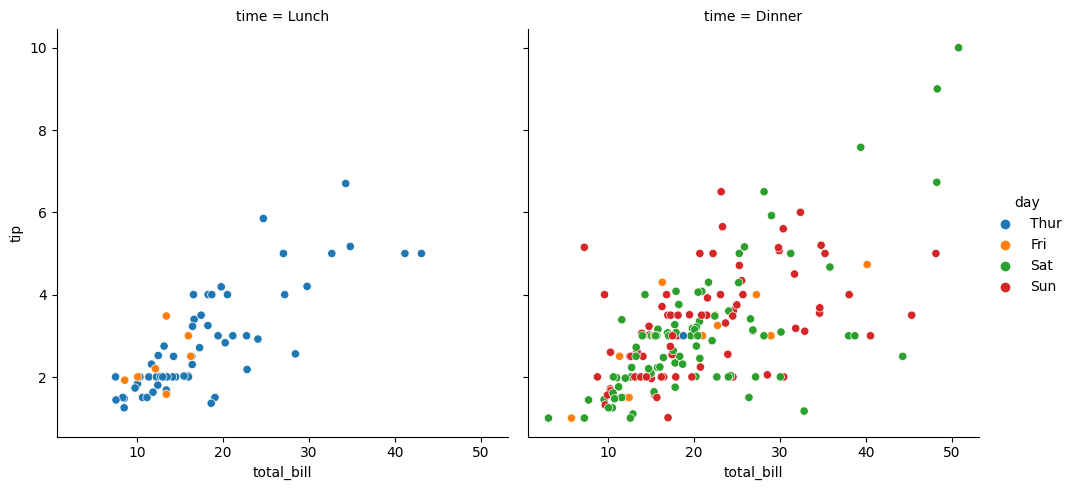

In [5]:
import seaborn as sns

# load sample data
tips = sns.load_dataset('tips')

sns.relplot(data=tips, x="total_bill", y="tip", hue="day", col="time")
cursor(hover=True)
plt.show()

In [7]:
pip install mplcursors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for mplcursors: filename=mplcursors-0.5.1-py3-none-any.whl size=20803 sha256=71acd4c44a6351cd77a1c78b36c37a8e72157b442d07c8cb1cdbfc6fc8fba2e4
  Stored in directory: /home/jovyan/.cache/pip/wheels/80/cd/4f/f7de556749f872b5b80e076c80f61ea600e77f35c621470d9d
Successfully built mplcursors
Note: you may need to restart the kernel to use updated packages.


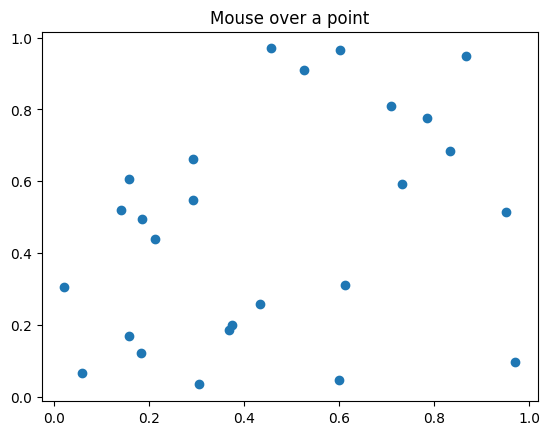

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")
crs = mplcursors.cursor(ax,hover=True)

crs.connect("add", lambda sel: sel.annotation.set_text(
    'Point {},{}'.format(sel.target[0], sel.target[1])))
plt.show()